## Miscellaneous Checkups and Plots

### Initialization

In [1]:
# Import the required modules:
import numpy as np
from mnist import MNIST

# Define folder paths:
DATA_folder  = '../../Data/'
MNIST_folder = DATA_folder+'MNIST/'

### Data Preparation

In [2]:
# Read-in the images and labels:
mndata = MNIST(MNIST_folder)
train_images, train_labels = mndata.load_training()
test_images,  test_labels  = mndata.load_testing()

# Convert to numpy:
train_imgs = np.array(train_images)
train_lbls = np.array(train_labels)
test_imgs = np.array(test_images)
test_lbls = np.array(test_labels)

# Clear regular:
train_images = None
train_labels = None
test_images  = None
test_labels  = None

# Normalize:
train_imgs = train_imgs/(np.float32(np.max(train_imgs)))
test_imgs  = test_imgs /(np.float32(np.max(test_imgs)))

### Sparsity Check:

In [3]:
### A) Sparsity Check (80% are white pixels -> makes sense to use SPARSE matrices)

sum(sum(train_imgs==0))/(len(train_imgs)*784)*100

80.879770408163267

### Contrast Check:

In [4]:
### B) Contrast Check (all images hit 254-255 ratio -> NO NEED to rescale)

myMin = 256

for k in range(0,len(train_imgs)):
    if(np.max(train_imgs[k])<255):
        #print(k)
        if(np.max(train_imgs[k])<myMin):
            myMin = np.max(train_imgs[k])
            
myMin

0.99607843137254903

### 2D PCA Plot:

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(train_imgs)

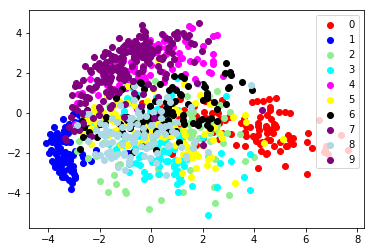

In [6]:
lim = 100

a = np.zeros((10,lim,2))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = transformed[k]
            m+=1
        if (m==lim):
            break
            
plt.scatter(a[0,:,0], a[0,:,1], label='0', c='red')
plt.scatter(a[1,:,0], a[1,:,1], label='1', c='blue')
plt.scatter(a[2,:,0], a[2,:,1], label='2', c='lightgreen')
plt.scatter(a[3,:,0], a[3,:,1], label='3', c='cyan')
plt.scatter(a[4,:,0], a[4,:,1], label='4', c='magenta')
plt.scatter(a[5,:,0], a[5,:,1], label='5', c='yellow')
plt.scatter(a[6,:,0], a[6,:,1], label='6', c='black')
plt.scatter(a[7,:,0], a[7,:,1], label='7', c='purple')
plt.scatter(a[8,:,0], a[8,:,1], label='8', c='lightblue')
plt.scatter(a[9,:,0], a[9,:,1], label='9', c='purple')

plt.legend()
plt.show()

### 3D PCA Plot:

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import Axes3D

pca = sklearnPCA(n_components=3) #2-dimensional PCA
transformed = pca.fit_transform(train_imgs)

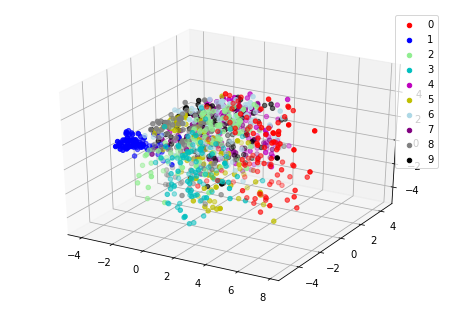

In [8]:
lim = 100

a = np.zeros((10,lim,3))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = transformed[k]
            m+=1
        if (m==lim):
            break
            
fig = plt.figure()
ax = ax = Axes3D(fig)

ax.scatter(a[0,:,0], a[0,:,1], a[0,:,2], label='0', c='r')
ax.scatter(a[1,:,0], a[1,:,1], a[1,:,2], label='1', c='b')
ax.scatter(a[2,:,0], a[2,:,1], a[2,:,2], label='2', c='lightgreen')
ax.scatter(a[3,:,0], a[3,:,1], a[3,:,2], label='3', c='c')
ax.scatter(a[4,:,0], a[4,:,1], a[4,:,2], label='4', c='m')
ax.scatter(a[5,:,0], a[5,:,1], a[5,:,2], label='5', c='y')
ax.scatter(a[6,:,0], a[6,:,1], a[6,:,2], label='6', c='lightblue')
ax.scatter(a[7,:,0], a[7,:,1], a[7,:,2], label='7', c='purple')
ax.scatter(a[8,:,0], a[8,:,1], a[8,:,2], label='8', c='gray')
ax.scatter(a[9,:,0], a[9,:,1], a[9,:,2], label='9', c='black')

plt.legend()
plt.show()

### 10D PCA Plot:

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=10) #2-dimensional PCA
transformed = pca.fit_transform(train_imgs)

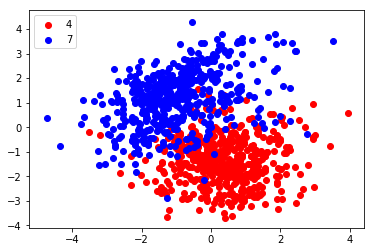

In [10]:
lim = 500

a = np.zeros((10,lim,10))

for n in range(0,10):
    m = 0
    for k in range(0,len(train_lbls)):
        if (train_lbls[k]==n):
            a[n][m] = transformed[k]
            m+=1
        if (m==lim):
            break
            
plt.scatter(a[4,:,4], a[4,:,6], label='4', c='red')
plt.scatter(a[7,:,4], a[7,:,6], label='7', c='blue')

plt.legend()
plt.show()